## Trajectory of All Synthetic Particles 

/Users/hart-davis/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in arccos


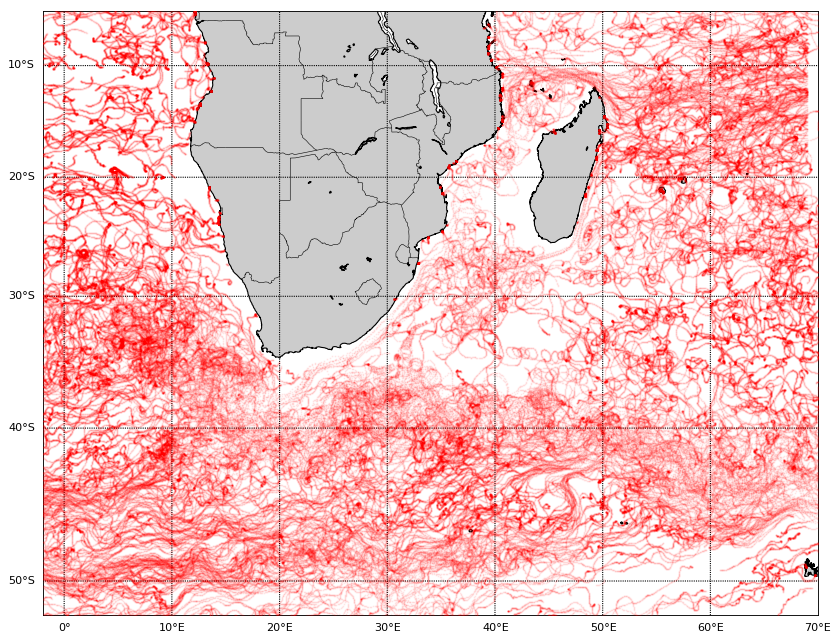

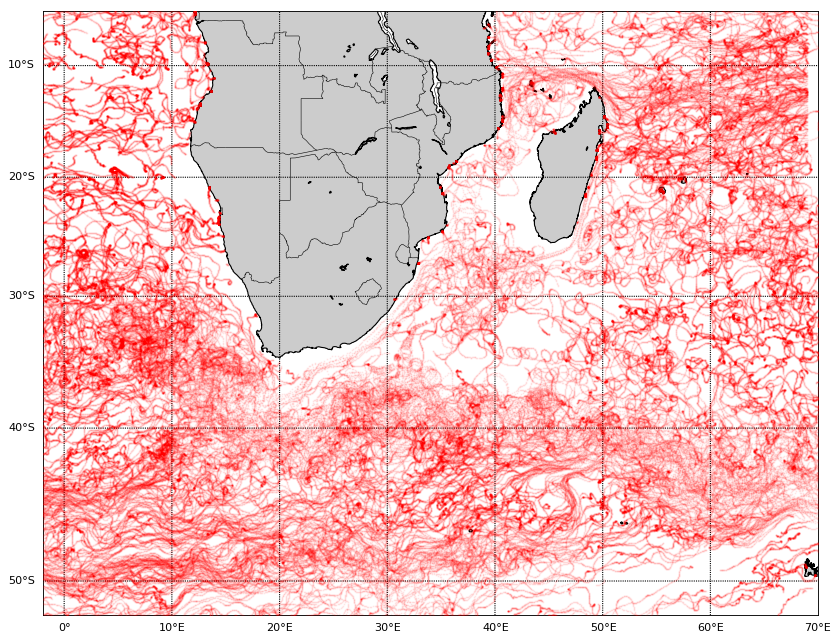

In [2]:
#The trajectory of all the synthetic particles

import math as mt
import pandas
import netCDF4
import numpy as np
import datetime
from datetime import timedelta
import glob
import matplotlib.pyplot as plt
from   mpl_toolkits.basemap import Basemap, cm
import cmocean as cm
from matplotlib.pyplot import figure

sites = pandas.read_csv("/Users/hart-davis/Desktop/Scripts/Drifter_Starting_Locations2.txt", sep="\t")

V = []
lon = []
lat = []
md = []
y = []

for xx in range(0,1041):
    si = sites.id[xx]
    
    tset = glob.glob("/Users/hart-davis/Desktop/Scripts/Simulations/*.nc")
    ts = netCDF4.Dataset(tset[xx])

    lat1 = ts.variables["lat"][0]
    lon1 = ts.variables["lon"][0]
    date = ts.variables["time"][0]
    d = date - 630720000
    
    for x in range(0,len(lat1[:-1])):
        dist1 = np.arccos(np.cos(np.radians(90-lat1[x]))*np.cos(np.radians(90-lat1[x+1]))+np.sin(np.radians(90-lat1[x]))*np.sin(np.radians(90-lat1[x+1]))*np.cos(np.radians(lon1[x]-lon1[x+1])))*6371*1000
        velocity1 = dist1/21600
        V.append(velocity1)
    
        lon.append(lon1[x])
        lat.append(lat1[x])
        
        idd = sites.id[xx]
        
        xy = datetime.datetime.fromtimestamp(d[x]) 
        datetime.datetime(1970, 01, 01, 01, 01, 01)

        month_day = [xy.month]
        md.append(idd)
        year = [xy.year]
        y.append(year)

map = Basemap(projection = "merc", resolution="i",llcrnrlon = -2, 
            llcrnrlat = -52, urcrnrlon = 70, urcrnrlat = -5,lat_0= -20,lon_0 = 0)

figure1 = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')


x1,y1 = map(lon,lat)
#-- draw coastlines, state and country boundaries, edge of map
map.drawcoastlines()
map.drawstates()
map.drawcountries()
map.fillcontinents()
map.drawparallels(np.arange(-90.,99.,10), color="k",labels=[1,0,0,0],fontsize=10)
map.drawmeridians(np.arange(-180.,180.,10), color="k",labels=[0,0,0,1],fontsize=10)


clevs = np.arange(0,2,0.01)
        
map.scatter(x1,y1,1,marker="o",color="red",alpha= 0.051,zorder=3)
#plt.title("(f)", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()